In [75]:
using Dates
T = @elapsed begin
    for _ in 1:10
        sleep(1)
    end
end

print(T)

10.015562043

In [94]:
using DataFrames
TestPath = "/home/nepero27178/TestPath.txt"

DF = DataFrame(
    :L => Int64[L for L in 10:10:100],
    :full => Float64[0.0 for _ in 10:10:100], # Write at every step
    # :half => Float64[0.0 for _ in 10:10:100], # Write every two steps
    # :quarter => Float64[0.0 for _ in 10:10:100] # Write every four steps
    :skip => Float64[0.0 for _ in 10:10:100], # Write every ten step
)

SkipDict = Dict([
        :full => 1,
        # :half => 2,
        # :quarter => 4,
        :skip => 10
    ])

Dict{Symbol, Int64} with 2 entries:
  :full => 1
  :skip => 10

In [95]:
for L in DF.L
    for (key, Skip) in SkipDict
        open(TestPath, "w") do io
            write(io, "start")
        end
        T = @elapsed begin
            for (i,Op) in enumerate(1:L^2) # Simulate O(L^2) algorithm
                sleep(0.000001)
                if mod(1, Skip)==0
                    open(TestPath, "a") do io
                        for _ in 1:Skip
                            write(io, "0\n")
                        end
                    end
                end
            end
        end
        DF[DF.L.==L, key] .= T
    end
end

In [96]:
DF

Row,L,full,skip
,Int64,Float64,Float64
1,10,0.255704,0.238761
2,20,0.951594,0.881006
3,30,2.20624,2.17982
4,40,3.86488,3.48472
5,50,5.58706,5.49925
6,60,8.15568,8.20662
7,70,11.7532,11.58
8,80,15.4975,14.7801
9,90,19.8913,19.5158


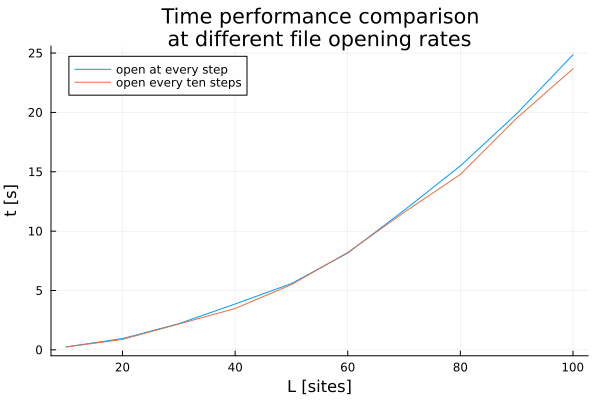

In [103]:
using Plots
plot(
    xlabel="L [sites]",
    ylabel="t [s]",
    title="Time performance comparison\nat different file opening rates"
)
plot!(DF.L, DF.full, label="open at every step")
plot!(DF.L, DF.skip, label="open every ten steps")